In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## binary image

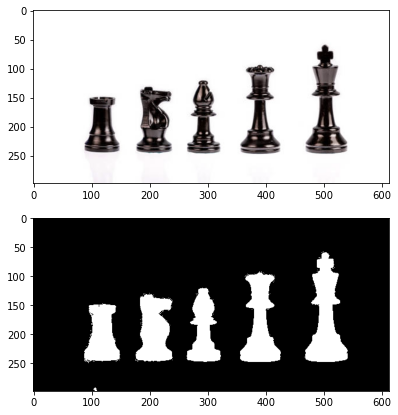

In [15]:
bgr =  cv2.imread('images/figures.jpeg')
gray = cv2.imread('images/figures.jpeg',cv2.IMREAD_GRAYSCALE)
_,bin_img = cv2.threshold(gray.copy(),240,255,cv2.THRESH_BINARY_INV)
fig,ax =plt.subplots(2,figsize=(10,7))
ax[1].imshow(bin_img,cmap='gray')
ax[0].imshow(bgr)


## finding contours

Text(0.5, 1.0, 'unsorted all drawn')

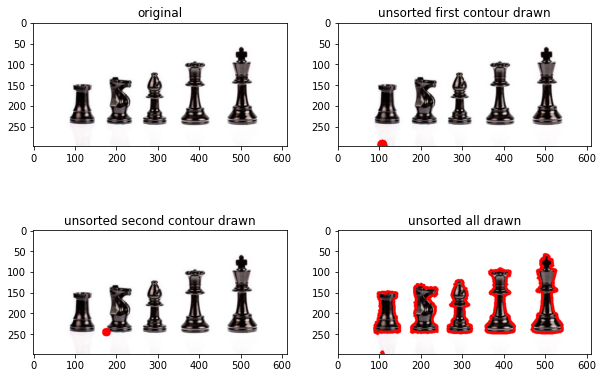

In [30]:
contours,hiers = cv2.findContours(bin_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
prelim0 = cv2.drawContours(bgr.copy(),contours,0,(255,0,0),20)
prelim1 = cv2.drawContours(bgr.copy(),contours,3,(255,0,0),20)
prelim2 = cv2.drawContours(bgr.copy(),contours,-1,(255,0,0),6)
fig,ax =plt.subplots(2,2,figsize=(10,7))
ax[0,0].imshow(bgr)
ax[0,0].set_title('original')
ax[0,1].imshow(prelim0)
ax[0,1].set_title('unsorted first contour drawn')
ax[1,0].imshow(prelim1)
ax[1,0].set_title('unsorted second contour drawn')
ax[1,1].imshow(prelim2)
ax[1,1].set_title('unsorted all drawn')

## Sorting contours according to the area

Text(0.5, 1.0, 'sorted all drawn')

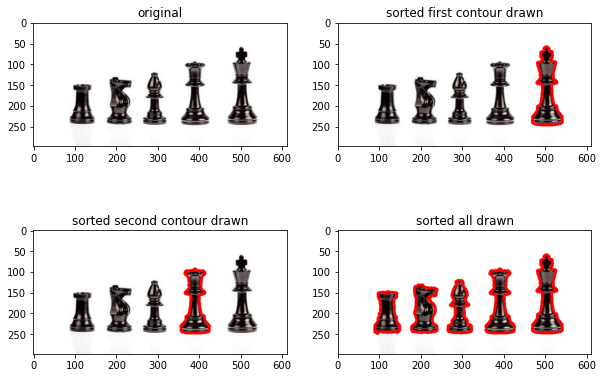

In [35]:
srtd = sorted(contours,key=cv2.contourArea,reverse=True)
prelim0 = cv2.drawContours(bgr.copy(),srtd,0,(255,0,0),6)
prelim1 = cv2.drawContours(bgr.copy(),srtd,1,(255,0,0),6)
prelim2 = cv2.drawContours(bgr.copy(),srtd[:5],-1,(255,0,0),6)
fig,ax =plt.subplots(2,2,figsize=(10,7))
ax[0,0].imshow(bgr)
ax[0,0].set_title('original')
ax[0,1].imshow(prelim0)
ax[0,1].set_title('sorted first contour drawn')
ax[1,0].imshow(prelim1)
ax[1,0].set_title('sorted second contour drawn')
ax[1,1].imshow(prelim2)
ax[1,1].set_title('sorted all drawn')


# bounding shapes

## bounding rectangle

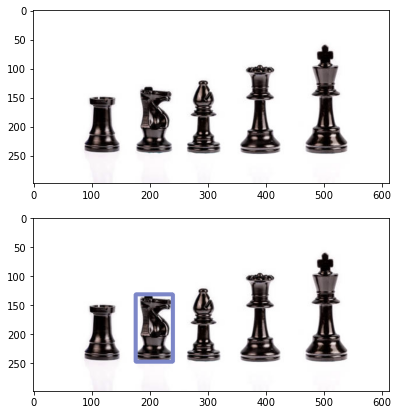

In [41]:
#function takes a counter at a time, returns coordinates and size of bounding rectangle
x,y,w,h = cv2.boundingRect(srtd[2])
rected = cv2.rectangle(bgr.copy(),(x,y),(x+w,y+h),(124,134,200),6)
fig,ax =plt.subplots(2,figsize=(10,7))
ax[0].imshow(bgr)
ax[1].imshow(rected)



## cropping using coordinates of bbox

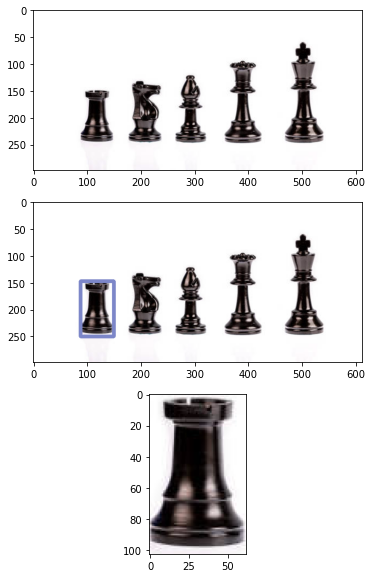

In [46]:
x,y,w,h = cv2.boundingRect(srtd[3])
rected = cv2.rectangle(bgr.copy(),(x,y),(x+w,y+h),(124,134,200),6)
fig,ax =plt.subplots(3,figsize=(10,10))
cropped = bgr[y:y+h,x:x+w]
ax[0].imshow(bgr)
ax[1].imshow(rected)
ax[2].imshow(cropped)

## minimum enclosing circle

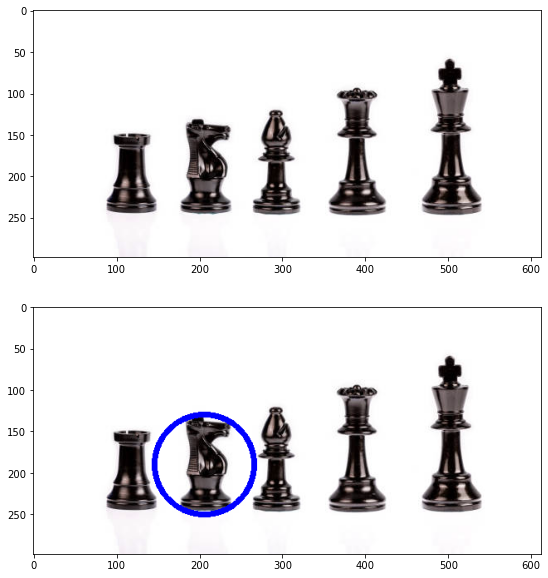

In [49]:
(x,y),r = cv2.minEnclosingCircle(srtd[2])
fig,ax =plt.subplots(2,figsize=(10,10))
#never forget convert x,y and r to integer
circled = cv2.circle(bgr.copy(),(int(x),int(y)),int(r),(0,0,255),5)
ax[0].imshow(bgr)
ax[1].imshow(circled)


## ellipse

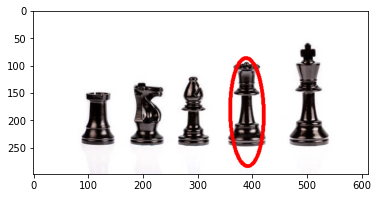

In [52]:
elp = cv2.fitEllipse(srtd[1])
#return required argument for ellipse drawing
ellipsed = cv2.ellipse(bgr.copy(),elp,color=(255,0,0),thickness=5)
plt.imshow(ellipsed)

## convex hull

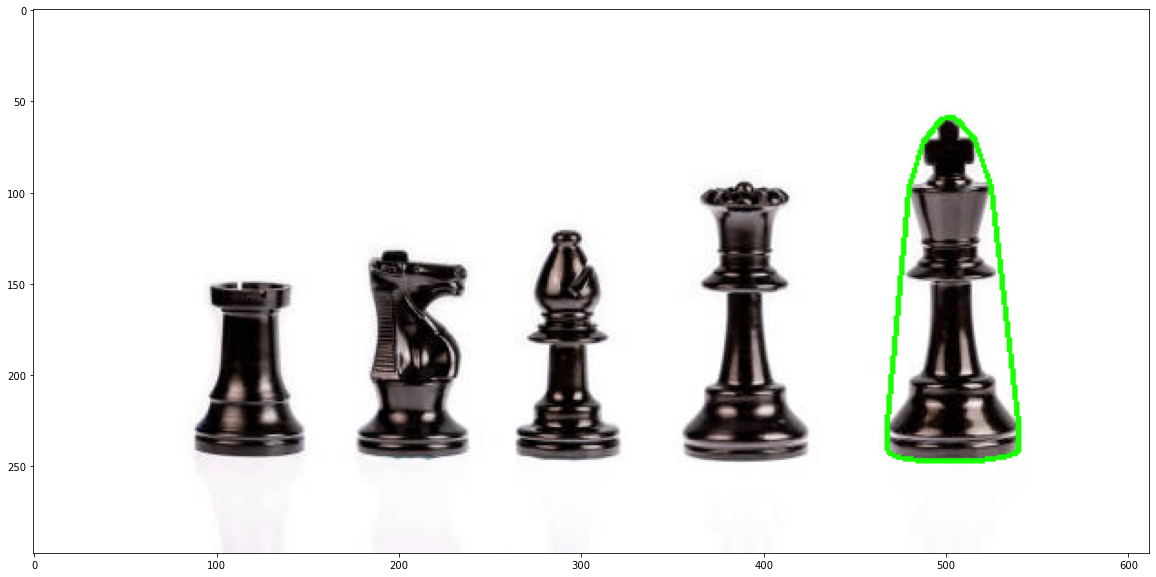

In [56]:
hull = cv2.convexHull(srtd[0])
hulled = cv2.drawContours(bgr.copy(),[hull],0,(24,255,0),2)
plt.figure(figsize=(20,15))
plt.imshow(hulled)